ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [24]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)

_Write your calculations and explanation here. You may use Python below if you want, but final reasoning must be readable._

Median and IQR are better than mean and standard deviation because median only calculates based on the middle value, and IQR takes the middle 50% of the data. Therefore, even if there are very large outliers, the data does not become heavily biased. On the other hand, mean and standard deviation are calculated by adding up all the data and dividing, and as a result, the standard deviation also increases. That is why median and IQR are better than mean and standard deviation.




In [25]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
df = pd.DataFrame({"data_q1":data_q1})
Q1 = df.quantile(.25)['data_q1']
Q3 = df.quantile(.75)['data_q1']
print(Q1)


median = df.median()
IQR = Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

if 500 < lower_bound or 500 > upper_bound:
  print(f"500 is an outlier")
else:
  print(f"500 is not an outlier")
print("IQR",IQR)
print("Median",median)

32.0
500 is an outlier
IQR 2.0
Median data_q1    33.0
dtype: float64


### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.



#### Q2 Answer (Student)

_Write your step by step Bayes calculation and explanation here._

The probability of having the disease is P(D) = 0.01
The probability of not having the disease is P(–D) = 1 – 0.01 = 0.99
The probability of testing positive when the disease is present is

P(T⁺|D) = 0.9 because sensitivity = 90 percent.

The probability of testing negative when the disease is not

present is P(T⁻|–D) = 0.92 because specificity = 92 percent

The probability of testing positive even though the
disease is not present is P(T⁺|–D) = 1 – 0.92 = 0.08,
because earlier we already know that if the disease is absent, the probability of testing negative is 0.92.

The probability of having the disease is
                P(D|T+) = P(T+|D)*P(D) / P(T+|D) * P(D) + P(T+|-D)*P(-D)

                        = 0.9*0.01/(0.9*0.01)+(0.08*0.99)

                        = 0.102 বা 10.2%

Now if prevalence increases,

      P(D) = 0.2, meaning the probability of having the disease
      P(-D) = 0.8, meaning the probability of not having the disease
      
                      P(D|T+) = P(T+|D)*P(D) / P(T+|D) * P(D) + P(T+|-D)*P(-D)
                        = 0.9*0.2/(0.9*0.01)+(0.08*0.8)
                        = 0.7377 বা 73.77%


If prevalence increases, meaning the true rate of the disease becomes higher, PPV (Positive Predictive Value) will also increase. When the rate of the disease is higher, the probability of testing positive for that disease also increases.

### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

_Write your task type, preprocessing list, and pipeline paragraph here._

1. This is a binary classification problem because the target column is premium_user, whose value is either 0 or 1.

2.
=> I will first process the age and daily_clicks columns. If there are any missing values, I will fill them using mean or median. And if there are too many missing values, such as more than 70%, then I will drop that column entirely.

=> If the age and daily_clicks columns contain very large or very small values, then I will perform scaling using any normalization technique that fits this dataset.

=> In this dataset, there is a column called region, which is categorical. Since my AI model cannot understand this directly, I will encode it. Using one-hot encoding, I will split this column into multiple columns and replace the categories with 0 and 1.

=> Finally, if there are any outliers, I will detect them and handle them properly.

3.
First, I will load my dataset using the pandas library. Then, if there are missing values, I will replace them using mean or median. If there are categorical columns, I will encode them. I will apply scaling to the age and daily_clicks columns so the model can learn better. After the data preprocessing is complete, I will train the data using a classification model such as Logistic Regression and test the model's overall performance using accuracy, precision, and recall.


---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


Null Value 
 age             2
region          0
purchases       1
premium_user    0
dtype: int64
-------------------
Unique Value 
 age             5
region          4
purchases       6
premium_user    2
dtype: int64
-------------------
Correlation among numeric columns 
                    age  purchases  premium_user
age           1.000000   0.923677      0.789534
purchases     0.923677   1.000000      0.825860
premium_user  0.789534   0.825860      1.000000 

Histogram of purchases 



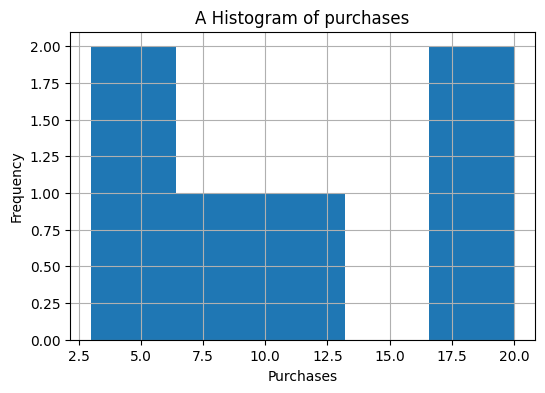



A bar chart of region frequency 



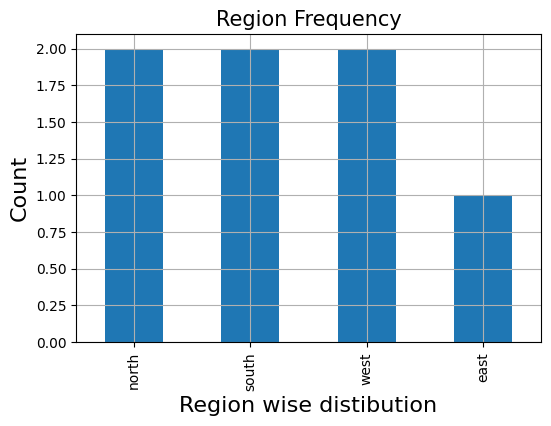

In [26]:
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
# 1. Compact EDA
null = df.isna().sum()
unique = df.nunique()
corr = df[["age","purchases","premium_user"]].corr()
print(f"Null Value \n {null}")
print("-------------------")
print(f"Unique Value \n {unique}")
print("-------------------")
print(f"Correlation among numeric columns \n {corr} \n")

import matplotlib.pyplot as plt

df["purchases"].hist(bins=5)
plt.xlabel("Purchases")
plt.ylabel("Frequency")
plt.title("A Histogram of purchases")
print("Histogram of purchases \n")
plt.show()
print("\n")

print("A bar chart of region frequency \n")
df['region'].value_counts().plot(kind='bar')
plt.xlabel("Region wise distibution",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("Region Frequency",fontsize=15)
plt.show()




In [27]:
# 2. Preprocess the dataset using sklearn plus pandas
from sklearn.impute import SimpleImputer

# Impute age with median.

median_imp = SimpleImputer(strategy="median")
df["age"] = median_imp.fit_transform(df[["age"]])


# Impute purchases with mean.

mean_imp = SimpleImputer(strategy="mean")
df["purchases"] = mean_imp.fit_transform(df[["purchases"]])


# One hot encode region.

encoded_df = pd.get_dummies(df,columns=["region"],drop_first=True)


# Scale all numeric columns using RobustScaler.
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
columns = ["age","purchases"]
encoded_df[columns] = scaler.fit_transform(encoded_df[columns])



# Domain driven features
encoded_df['high_spender'] = (df['purchases'] > 10).astype(int)

encoded_df

,age,purchases,premium_user,region_north,region_south,region_west,high_spender
0,-0.5,-0.943820,0,True,False,False,0
1,0.0,0.000000,1,False,True,False,0
2,0.0,-0.674157,0,True,False,False,0
3,-0.8,0.112360,0,False,False,False,1
4,1.5,1.348315,1,False,False,True,1
5,2.2,1.078652,1,False,False,True,1
6,0.0,-0.134831,0,False,True,False,0


_Use additional code cells below for EDA, preprocessing, feature engineering, and final dataframe. Add brief explanations in markdown between code blocks._

---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


Intercept: -33.84615384615387
Coefficients: [0.15384615 5.38461538]
Predictions: [100.         130.76923077]
MAE: 19.615384615384613
RMSE: 19.61915499208746
R²: -0.7107166337935567


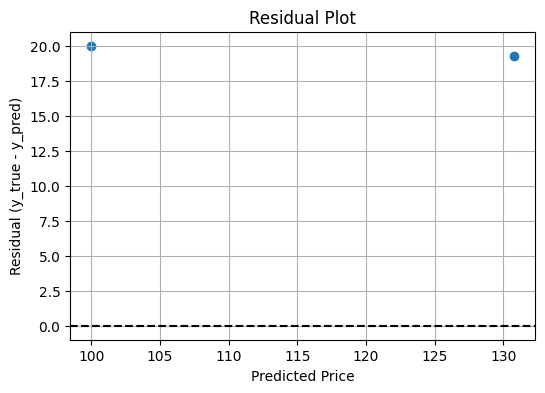

In [28]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df2[['area_sqft','bedrooms']]
y = df2["price"]

# Split the data into train and test with 80 percent train and 20 percent test.

X_train,X_test,Y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fit a LinearRegression model to predict price from area_sqft and bedrooms
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)


print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)

y_pred = lr_model.predict(X_test)
print("Predictions:", y_pred)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residual (y_true - y_pred)")
plt.title("Residual Plot")
plt.show()


_Use additional code cells below for train test split, model training, metrics, and the residual plot. Add a brief comment on the residuals in markdown._

The residual plot shows only two points, which means the test sample contains only two data points. This small test size is one of the reasons why the R² value is negative. If a model learns well, the residual plot usually contains many scattered points around the zero line. But here, that pattern is missing, which indicates that the model failed to capture the true pattern of the data.

The prediction errors are also around 20, which is quite high. When the error margin is this large, it suggests the model did not learn effectively.

Therefore, based on the Intercept, Coefficients, Predictions, MAE, RMSE, and R² values, it is clear that this model failed to produce the expected results.


---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [29]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])


from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score


# Write your code for threshold 0.5 and 0.3 below

# with 0.5 threshold
pred_y_0_5 = (y_prob >= 0.5).astype(int)

c_mat_0_5 = confusion_matrix(y_true,pred_y_0_5)
precision_0_5 = precision_score(y_true,pred_y_0_5)
recall_0_5 = recall_score(y_true,pred_y_0_5)
f1_0_5=f1_score(y_true,pred_y_0_5)


# with 0.3 threshold
pred_y_0_3 = (y_prob >= 0.3).astype(int)

c_mat_0_3 = confusion_matrix(y_true,pred_y_0_3)
precision_0_3 = precision_score(y_true,pred_y_0_3)
recall_0_3 = recall_score(y_true,pred_y_0_3)
f1_0_3=f1_score(y_true,pred_y_0_3)

print("With 0.5 Threshold \n")
print(f"c_mat_0_5: {c_mat_0_5} \n")
print(f"precisoin_0_5: {precision_0_5}\n")
print(f"recall_0_5: {recall_0_5} \n")
print(f"f1_0_5: {f1_0_5} \n")

print("With 0.3 Threshold \n")
print(f"c_mat_0_3: {c_mat_0_3} \n")
print(f"precisoin_0_3: {precision_0_3} \n")
print(f"recall_0_3: {recall_0_3} \n")
print(f"f1_0_3: {f1_0_3} \n")





# With threshold 0.5, convert probabilities to class predictions.




With 0.5 Threshold 

c_mat_0_5: [[5 0]
 [0 5]] 

precisoin_0_5: 1.0

recall_0_5: 1.0 

f1_0_5: 1.0 

With 0.3 Threshold 

c_mat_0_3: [[3 2]
 [0 5]] 

precisoin_0_3: 0.7142857142857143 

recall_0_3: 1.0 

f1_0_3: 0.8333333333333334 



When I lower the threshold from 0.5 to 0.3, I see that precision decreases from 1 to 0.7142857142857143 . This means that by lowering the threshold, the model predicts more true positives, but at the same time, the number of false positives also increases. When false positives increase, precision decreases. Meanwhile, recall increases as the model catches more positive cases. In both cases, recall is 1, which means the model successfully identifies all the true positive cases every time.

AUC:  1.0


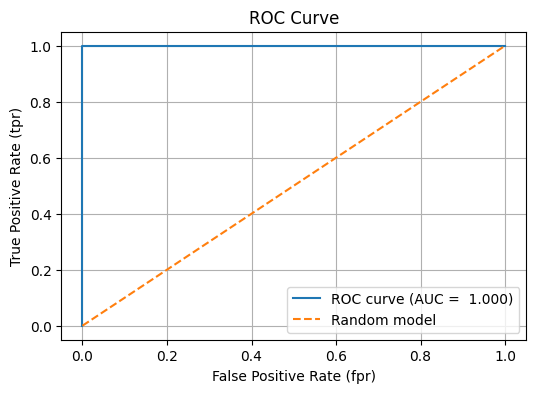

In [30]:
# Part 2

fpr,tpr,thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr,tpr)
print('AUC: ',round(roc_auc, 3))

plt.figure()
plt.plot(fpr,tpr, label=f'ROC curve (AUC = {roc_auc: .3f})')
plt.plot([0,1], [0,1], linestyle='--', label='Random model')
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title("ROC Curve")
plt.legend()
plt.show()

_Add more code cells for ROC and AUC, and for the decision tree on df3. Write your short explanations in markdown after the relevant outputs._

If the AUC is very high (close to 1), the model can clearly distinguish between positive and negative classes. If the AUC is 0.5, the model behaves like random guessing, and if it is below 0.5, the model is separating the classes incorrectly.



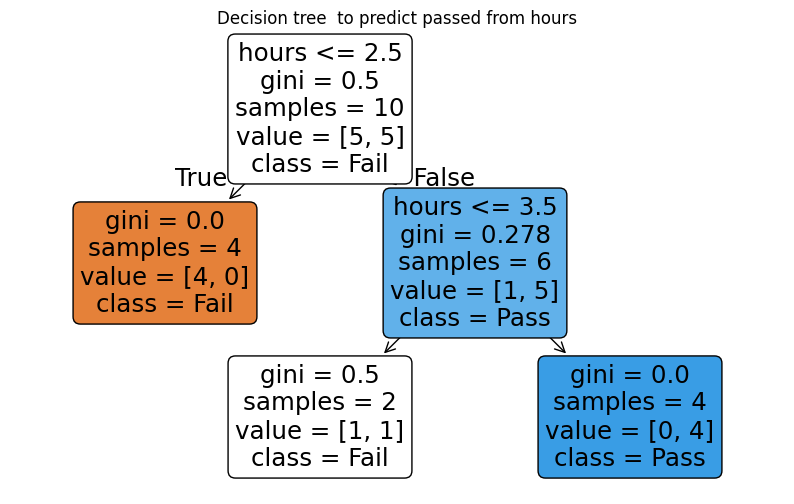

In [31]:
# Part 3
from sklearn.tree import DecisionTreeClassifier,plot_tree

df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
x = df3[["hours"]]
y = df3[["passed"]]

dtclf = DecisionTreeClassifier(max_depth=2,random_state=42)
dtclf.fit(x,y)

plt.figure(figsize=(10,6))
plot_tree(dtclf, feature_names=["hours"], class_names=["Fail", "Pass"], filled=True, rounded=True)
plt.title("Decision tree  to predict passed from hours")
plt.show()


From the above decision tree, I understand that this model has been trained well and will perform well on small datasets. The tree has a low depth, which is suitable for small datasets and helps achieve good results. However, if the data is more complex, this model may make incorrect decisions.

